<a href="https://colab.research.google.com/github/Deepa015/titanic-using-logistic-regression-and-Knn/blob/master/knn_and_LR_for_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **using logistic regression**

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
sf=pd.read_csv('test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.shape

(891, 12)

In [3]:
q=['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Age','Embarked']
df_train_set=df.drop(q,axis=1)
df_train_set

,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500
...,...,...,...,...
886,0,2,male,13.0000
887,1,1,female,30.0000
888,0,3,female,23.4500
889,1,1,male,30.0000


In [4]:
z=['Name','Ticket','Cabin','SibSp','Parch','Age','Embarked']
df_test_set=sf.drop(z,axis=1)
df_test_set

,PassengerId,Pclass,Sex,Fare
0,892,3,male,7.8292
1,893,3,female,7.0000
2,894,2,male,9.6875
3,895,3,male,8.6625
4,896,3,female,12.2875
...,...,...,...,...
413,1305,3,male,8.0500
414,1306,1,female,108.9000
415,1307,3,male,7.2500
416,1308,3,male,8.0500


In [0]:
mean=df_test_set["Fare"].mean()
df_test_set["Fare"]=df_test_set["Fare"].fillna(mean)

In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_train_set['Sex']= label_encoder.fit_transform(df_train_set['Sex']) 
df_train_set['Sex'].unique()

array([1, 0])

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_test_set['Sex']= label_encoder.fit_transform(df_test_set['Sex']) 
df_test_set['Sex'].unique()

array([1, 0])

In [0]:
x=df_train_set.iloc[:,1:4].values
y=df_train_set.iloc[:,0].values

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [15]:
 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score,classification_report
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.8067


In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       241
           1       0.69      0.73      0.71       116

    accuracy                           0.81       357
   macro avg       0.78      0.79      0.78       357
weighted avg       0.81      0.81      0.81       357



**using knn method**

In [0]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k_range=range(1,26)
scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)  

[0.7927170868347339, 0.7843137254901961, 0.773109243697479, 0.7591036414565826, 0.7675070028011205, 0.7450980392156863, 0.7563025210084033, 0.7703081232492998, 0.7507002801120448, 0.7535014005602241, 0.742296918767507, 0.7394957983193278, 0.7478991596638656, 0.7394957983193278, 0.7282913165266106, 0.7338935574229691, 0.7366946778711485, 0.7478991596638656, 0.7535014005602241, 0.7478991596638656, 0.7507002801120448, 0.7478991596638656, 0.7535014005602241, 0.742296918767507, 0.7282913165266106]


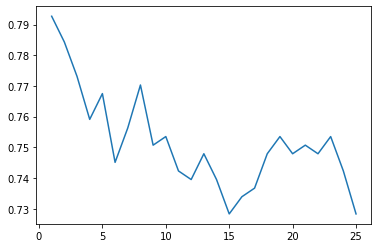

In [19]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.773109243697479


In [21]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       234
           1       0.67      0.67      0.67       123

    accuracy                           0.77       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.77      0.77      0.77       357

